### Preliminary Exploratory Data Analysis:

In [2]:
library(tidyverse)
library(readxl)
library(tidymodels)
library(cowplot)
options(repr.matrix.rows=6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

#### Reading the Data

In [12]:
set.seed(2020)

training_data <- read_csv("Training_KAHRAMAN.csv")
testing_data <- read_csv("Testing_KAHRAMAN.csv")
head(training_data, 10)
head(testing_data, 10)

Warning message:
“Missing column names filled in: 'X7' [7], 'X8' [8]”
Parsed with column specification:
cols(
  STG = col_double(),
  SCG = col_double(),
  STR = col_double(),
  LPR = col_double(),
  PEG = col_double(),
  UNS = col_character(),
  X7 = col_logical(),
  X8 = col_logical(),
  `Attribute Information:` = col_character()
)

Warning message:
“Missing column names filled in: 'X7' [7], 'X8' [8]”
Parsed with column specification:
cols(
  STG = col_double(),
  SCG = col_double(),
  STR = col_double(),
  LPR = col_double(),
  PEG = col_double(),
  UNS = col_character(),
  X7 = col_logical(),
  X8 = col_logical(),
  `Attribute Information:` = col_character()
)



STG,SCG,STR,LPR,PEG,UNS,X7,X8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.08,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.06,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.10,0.10,0.15,0.65,0.30,Middle,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.08,0.08,0.08,0.98,0.24,Low,NA,NA,PEG (The exam performance of user for goal objects)
0.09,0.15,0.40,0.10,0.66,Middle,NA,NA,UNS (The knowledge level of user)
0.10,0.10,0.43,0.29,0.56,Middle,NA,NA,NA
0.15,0.02,0.34,0.40,0.01,very_low,NA,NA,NA
0.20,0.14,0.35,0.72,0.25,Low,NA,NA,NA


STG,SCG,STR,LPR,PEG,UNS,X7,X8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low,NA,NA,"STG (The degree of study time for goal object materails),"
0.05,0.05,0.55,0.60,0.14,Low,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.08,0.18,0.63,0.60,0.85,High,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.20,0.20,0.68,0.67,0.85,High,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.22,0.22,0.90,0.30,0.90,High,NA,NA,PEG (The exam performance of user for goal objects)
0.14,0.14,0.70,0.50,0.30,Low,NA,NA,UNS (The knowledge level of user)
0.16,0.16,0.80,0.50,0.50,Middle,NA,NA,NA
0.12,0.12,0.75,0.68,0.15,Low,NA,NA,NA
0.20,0.20,0.88,0.77,0.80,High,NA,NA,NA


#### Tidying the Data

In [13]:


training_tidy <- training_data %>%
                    select(STG, SCG, STR, LPR, PEG, UNS) %>%
                    mutate(UNS = as_factor(UNS))
testing_tidy <- testing_data %>%
                    select(STG, SCG, STR, LPR, PEG, UNS)%>%
                    mutate(UNS = as_factor(UNS))
training_summary <- training_tidy %>%
                        summarise(avg_STG = mean(STG),
                                  avg_SCG = mean(SCG), 
                                  avg_STR = mean(STR), 
                                  avg_LPR = mean(LPR), 
                                  avg_PEG = mean(PEG))
head(training_tidy)
head(testing_tidy)
training_summary

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
0.20,0.20,0.68,0.67,0.85,High
0.22,0.22,0.90,0.30,0.90,High
0.14,0.14,0.70,0.50,0.30,Low


avg_STG,avg_SCG,avg_STR,avg_LPR,avg_PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4680039,0.4327132,0.4585388


#### Visualizing the Data

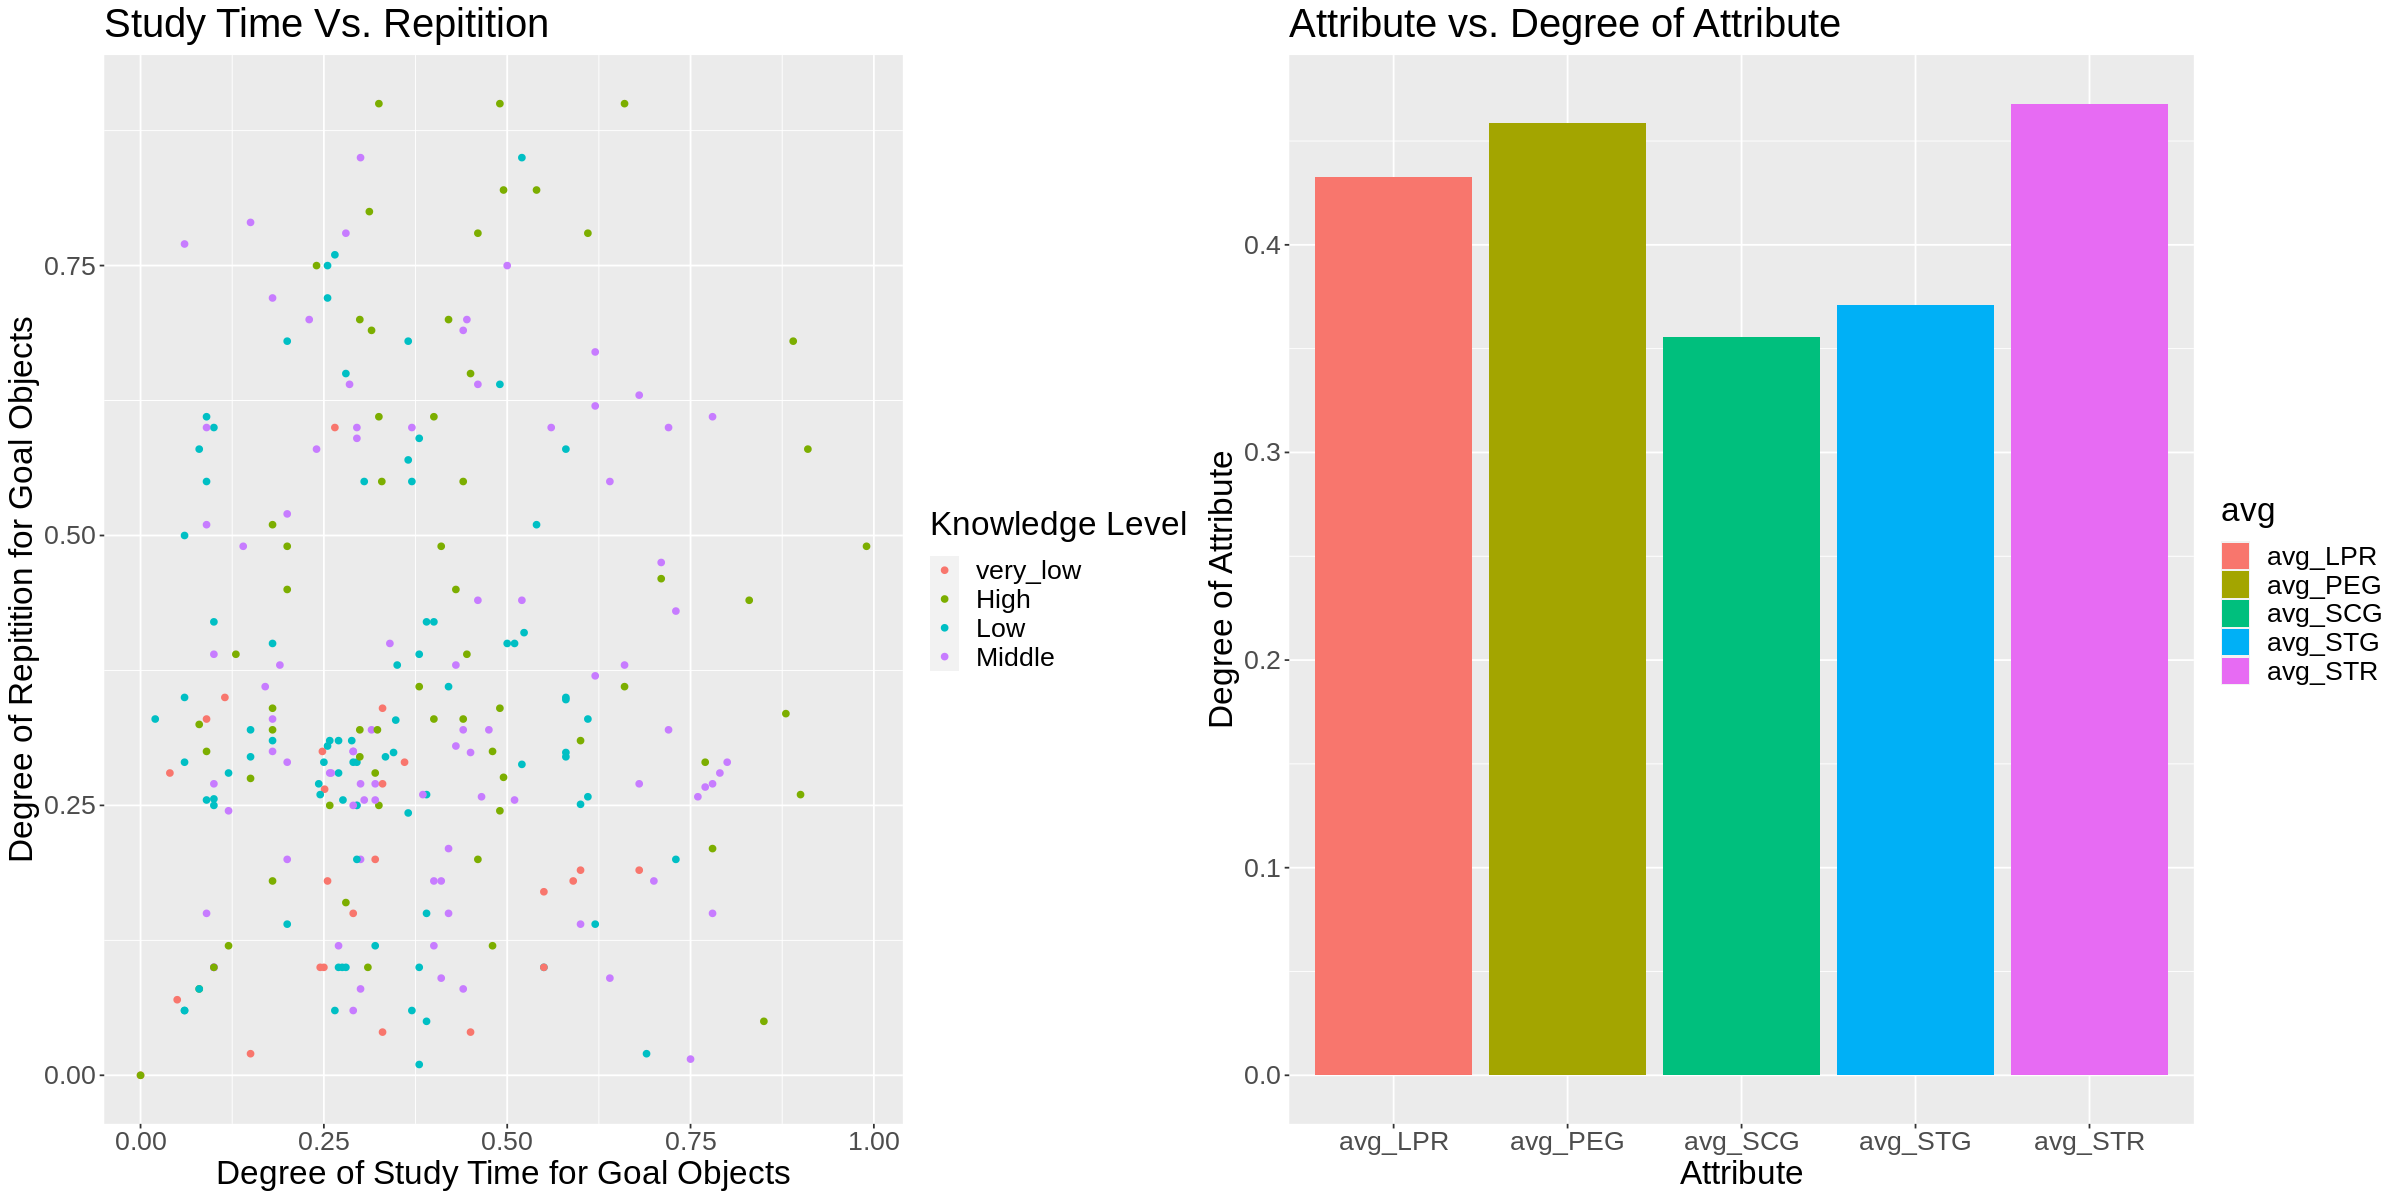

In [21]:
options(repr.plot.width=20)
options(repr.plot.height=10)
spread_plot <- training_tidy %>%
                    ggplot(aes(x = STG, y = SCG, colour = UNS)) +
                        geom_point() +
                        labs(title = "Study Time Vs. Repitition", x = "Degree of Study Time for Goal Objects", y = "Degree of Repitition for Goal Objects", colour = "Knowledge Level") +
                        theme(text = element_text(size = 20))
training_long <- training_summary %>%
                    pivot_longer(cols = 5:1, names_to = "avg", values_to = "value")
                    
averages_plot <- training_long %>%
                    ggplot(aes(avg, value, fill = avg)) +
                    geom_col() +
                    labs(x = "Attribute", y = "Degree of Attribute", title = "Attribute vs. Degree of Attribute") +
                    theme(text = element_text(size=20))
plot_grid(spread_plot, averages_plot)

In [15]:
set.seed(2020)

uns_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
       set_engine("kknn") %>%
       set_mode("classification") 

uns_recipe <- recipe(UNS ~ STG + SCG, data = training_tidy) %>%
       step_scale(all_predictors()) %>%
       step_center(all_predictors())


In [16]:
set.seed(2020)
uns_vfold <-vfold_cv(training_tidy, v = 5, strata = UNS)

uns_workflow <- workflow() %>%
                    add_recipe(uns_recipe) %>%
                    add_model(uns_spec)

In [18]:
set.seed(2020)
                                      
uns_results <- uns_workflow %>%
                   tune_grid(resamples = uns_vfold, grid = 5) %>%
                   collect_metrics() %>%
                   filter(.metric == "accuracy") 
                   
                   
uns_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.3526210,5,0.02023987,Model1
6,accuracy,multiclass,0.3686787,5,0.02128417,Model2
8,accuracy,multiclass,0.3451493,5,0.02235519,Model3
10,accuracy,multiclass,0.3414511,5,0.02695333,Model4
13,accuracy,multiclass,0.3336891,5,0.04003405,Model5
